In [34]:
import pandas as pd
import numpy as np
from scipy.optimize import linear_sum_assignment

# Load the Excel file
file_path = '/Users/jacksonsiemens/Desktop/R/Basebol/data/orioles_lineups.xlsx'
player_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
player_data

,id,Name,bats,bat,bat_sd,plat,bat_vsRHP,bat_vsLHP,C,1B,2B,3B,SS,LF,CF,RF
0,BAL,Cedric Mullins,L,3.7,19,18,12.7,-5.3,NaN,NaN,NaN,NaN,NaN,15.0,8.0,13.0
1,BAL,Austin Hays,R,1.3,9,-8,-2.7,5.3,NaN,NaN,NaN,NaN,NaN,6.0,-4.0,8.0
2,BAL,Colton Cowser,L,0.3,11,18,9.3,-8.7,NaN,NaN,NaN,NaN,NaN,7.0,1.0,5.0
3,BAL,Ryan McKenna,R,-1.0,21,-3,-2.5,0.5,NaN,NaN,NaN,NaN,NaN,7.0,3.0,4.0
4,BAL,Aaron Hicks,S,-2.4,19,4,-0.4,-4.4,NaN,NaN,NaN,NaN,NaN,4.0,-3.0,3.0
5,BAL,Hudson Haskin,R,0.0,21,-6,-3.0,3.0,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2.0
6,BAL,Sam Hilliard,L,-1.0,9,18,8.0,-10.0,NaN,NaN,NaN,NaN,NaN,0.0,-4.0,2.0
7,BAL,Kyle Stowers,R,0.0,19,10,5.0,-5.0,NaN,NaN,NaN,NaN,NaN,0.0,-10.0,2.0
8,BAL,Jorge Mateo,R,-1.8,20,-8,-5.8,2.2,NaN,NaN,9.0,4.0,13.0,2.0,-3.0,0.0
9,BAL,Terrin Vavra,R,0.0,10,18,9.0,-9.0,NaN,NaN,-5.0,-8.0,NaN,2.0,-9.0,-1.0


In [35]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def optimize_dual_lineups(player_data):
    positions = ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF']
    max_players = 12

    # Function to create an optimized lineup
    def create_optimized_lineup(against_pitcher_type):
        bat_column = f'bat_vs{against_pitcher_type}'
        sd_column = 'bat_sd'

        total_performance_matrix = np.full((len(player_data), len(positions) + 1), -1000.0)  # Include DH

        for i, position in enumerate(positions):
            can_play = player_data[position] > -1000
            total_performance_matrix[can_play, i] = player_data[bat_column][can_play] + player_data[position][can_play]

        total_performance_matrix[:, -1] = player_data[bat_column]

        row_ind, col_ind = linear_sum_assignment(-total_performance_matrix)
        optimized_runs = total_performance_matrix[row_ind, col_ind].sum()
        optimized_lineup = player_data.iloc[row_ind]
        positions_with_dh = positions + ['DH']
        optimized_lineup['Position'] = [positions_with_dh[i] for i in col_ind]
        lineup_sd = np.sqrt((player_data.iloc[row_ind][sd_column] ** 2).sum())

        return optimized_lineup, optimized_runs, lineup_sd, set(row_ind)

    # Optimize lineup against RHP
    rhp_lineup, rhp_runs, rhp_sd, rhp_players = create_optimized_lineup('RHP')

    # Optimize lineup against LHP with consideration of player overlap
    lhp_lineup, lhp_runs, lhp_sd, lhp_players = create_optimized_lineup('LHP')

    # Ensure no more than max_players are used
    combined_players = rhp_players.union(lhp_players)
    while len(combined_players) > max_players:
        # Adjust LHP lineup to reuse players from RHP lineup
        # This logic can be further refined based on specific team/player strategies
        # For now, it iteratively removes the least contributing player from LHP lineup
        # that is not in the RHP lineup and recalculates the lineup
        least_contributing_player = min(lhp_players - rhp_players, key=lambda x: player_data.iloc[x]['bat_vsLHP'])
        player_data.at[least_contributing_player, 'bat_vsLHP'] = -1000  # Effectively removing the player for LHP consideration
        lhp_lineup, lhp_runs, lhp_sd, lhp_players = create_optimized_lineup('LHP')
        combined_players = rhp_players.union(lhp_players)

    return rhp_lineup, rhp_runs, rhp_sd, lhp_lineup, lhp_runs, lhp_sd

# Example usage:
optimized_rhp_lineup, optimized_rhp_runs, optimized_rhp_sd, optimized_lhp_lineup, optimized_lhp_runs, optimized_lhp_sd = optimize_dual_lineups(player_data)


/var/folders/8n/g8bq8_011kv24tnfb649vgmw0000gn/T/ipykernel_1988/49421829.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8n/g8bq8_011kv24tnfb649vgmw0000gn/T/ipykernel_1988/49421829.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8n/g8bq8_011kv24tnfb649vgmw0000gn/T/ipykernel_1988/49421829.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [36]:
optimized_rhp_lineup

,id,Name,bats,bat,bat_sd,plat,bat_vsRHP,bat_vsLHP,C,1B,2B,3B,SS,LF,CF,RF,Position
0,BAL,Cedric Mullins,L,3.7,19,18,12.7,-5.3,NaN,NaN,NaN,NaN,NaN,15.0,8.0,13.0,LF
2,BAL,Colton Cowser,L,0.3,11,18,9.3,-8.7,NaN,NaN,NaN,NaN,NaN,7.0,1.0,5.0,CF
6,BAL,Sam Hilliard,L,-1.0,9,18,8.0,-10.0,NaN,NaN,NaN,NaN,NaN,0.0,-4.0,2.0,RF
13,BAL,Anthony Santander,S,10.5,14,7,14.0,7.0,NaN,-4.0,NaN,NaN,NaN,-8.0,NaN,-10.0,DH
14,BAL,Ryan O'Hearn,L,1.2,22,18,10.2,-7.8,NaN,-3.0,NaN,NaN,NaN,-6.0,NaN,-11.0,1B
15,BAL,Joey Ortiz,R,-0.1,14,-9,-4.6,4.4,NaN,7.0,15.0,13.0,11.0,NaN,NaN,NaN,2B
16,BAL,Jackson Holliday,L,3.3,21,20,13.3,-6.7,NaN,NaN,7.0,4.0,5.0,NaN,NaN,NaN,SS
17,BAL,Gunnar Henderson,L,20.9,19,25,33.4,8.4,NaN,5.0,0.0,10.0,5.0,NaN,NaN,NaN,3B
22,BAL,Adley Rutschman,S,22.2,9,10,27.2,17.2,12.0,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,C


In [37]:
optimized_lhp_lineup

,id,Name,bats,bat,bat_sd,plat,bat_vsRHP,bat_vsLHP,C,1B,2B,3B,SS,LF,CF,RF,Position
0,BAL,Cedric Mullins,L,3.7,19,18,12.7,-5.3,NaN,NaN,NaN,NaN,NaN,15.0,8.0,13.0,LF
1,BAL,Austin Hays,R,1.3,9,-8,-2.7,5.3,NaN,NaN,NaN,NaN,NaN,6.0,-4.0,8.0,RF
2,BAL,Colton Cowser,L,0.3,11,18,9.3,-8.7,NaN,NaN,NaN,NaN,NaN,7.0,1.0,5.0,CF
13,BAL,Anthony Santander,S,10.5,14,7,14.0,7.0,NaN,-4.0,NaN,NaN,NaN,-8.0,NaN,-10.0,DH
15,BAL,Joey Ortiz,R,-0.1,14,-9,-4.6,4.4,NaN,7.0,15.0,13.0,11.0,NaN,NaN,NaN,2B
17,BAL,Gunnar Henderson,L,20.9,19,25,33.4,8.4,NaN,5.0,0.0,10.0,5.0,NaN,NaN,NaN,SS
19,BAL,Jordan Westburg,R,3.0,14,-7,-0.5,6.5,NaN,NaN,-2.0,3.0,-10.0,NaN,NaN,NaN,3B
21,BAL,Ryan Mountcastle,R,10.0,22,-11,4.5,15.5,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1B
22,BAL,Adley Rutschman,S,22.2,9,10,27.2,17.2,12.0,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,C


In [28]:
def calculate_lineup_statistics(optimized_lineup, player_data, pitcher_hand, n_simulations=3000):
    bat_column = f'bat_vs{pitcher_hand}'
    positions_ordered = ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'DH']
    total_lineup_raa_simulations = []

    for _ in range(n_simulations):
        total_raa_simulation = 0
        for position in positions_ordered:
            player = optimized_lineup[optimized_lineup['Position'] == position].iloc[0]
            mean_performance = player[bat_column]
            sd_performance = player_data.loc[player.name, 'bat_sd']

            # Simulate individual batting performance
            simulated_batting_performance = np.random.normal(mean_performance, sd_performance)

            # Add defensive value (if not DH)
            total_performance = simulated_batting_performance + player[position] if position != 'DH' else simulated_batting_performance

            total_raa_simulation += total_performance

        total_lineup_raa_simulations.append(total_raa_simulation)

    # Calculate SD and percentiles from the simulations
    lineup_sd = np.std(total_lineup_raa_simulations)
    percentile_25 = np.percentile(total_lineup_raa_simulations, 25)
    percentile_75 = np.percentile(total_lineup_raa_simulations, 75)
    mean_total_lineup_raa = np.mean(total_lineup_raa_simulations)

    return  mean_total_lineup_raa, lineup_sd, percentile_25, percentile_75


In [27]:
import pandas as pd
import numpy as np
from scipy.optimize import linear_sum_assignment
import plotly.graph_objects as go


def create_and_display_lineup_visual(optimized_lineup, player_data, pitcher_hand):
    # Column to use based on pitcher hand
    bat_column = f'bat_vs{pitcher_hand}'
    # Create the full lineup summary table and obtain lineup statistics
    summary_table, lineup_sd, total_lineup_raa, percentile_25, percentile_75 = create_full_lineup_summary_table(optimized_lineup, player_data, pitcher_hand)

    # Define the color scheme based on team colors or preference
    color_scheme = {
        'header': 'white',
        'cell': ['white', '#FFA500'],  # alternating colors for rows, orange color for the Orioles
        'text': 'black',
        'title_text': 'black',
        'background': 'white'
    }

    # Create the styled Plotly table with updated title
    title = f"Lineup vs. {pitcher_hand} - Mean RAA: {total_lineup_raa:.2f}<br>" \
            f"SD: {lineup_sd:.2f}, 25th Percentile: {percentile_25:.2f}, 75th Percentile: {percentile_75:.2f}"
    styled_table = create_styled_plotly_table(summary_table, title, color_scheme)

    # Display the styled table
    styled_table.show()



def create_full_lineup_summary_table(optimized_lineup, player_data, pitcher_hand):
    bat_column = f'bat_vs{pitcher_hand}'
    positions_ordered = ['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'DH']
    summary_data = []

    # Calculate statistics for the lineup
    total_lineup_raa,lineup_sd, percentile_25, percentile_75 = calculate_lineup_statistics(optimized_lineup, player_data, pitcher_hand, n_simulations= 1000)

    for position in positions_ordered:
        player = optimized_lineup[optimized_lineup['Position'] == position].iloc[0]
        offensive_raa = player[bat_column]
        defensive_raa = player[position] if position != 'DH' else 0
        total_raa = offensive_raa + defensive_raa
        summary_data.append([position, player['Name'], offensive_raa, defensive_raa, total_raa])


    # Create DataFrame with the necessary columns
    summary_df = pd.DataFrame(summary_data, columns=['Position', 'Player', 'Offensive RAA', 'Defensive RAA', 'Total RAA'])

    return summary_df, lineup_sd, total_lineup_raa, percentile_25, percentile_75

def create_styled_plotly_table(summary_table, title, color_scheme):
    # Drop any existing total row to avoid duplication
    summary_table = summary_table[summary_table['Position'] != 'Total'].copy()
    # Calculate the total RAA for the lineup and round to two decimal places
    total_raa = round(summary_table['Total RAA'].sum(), 2)
    # Add a total row at the end of the dataframe
    summary_table.loc['Total'] = ['Total', '', '', '', total_raa]

    # Round all numeric values to two decimal places
    for col in ['Offensive RAA', 'Defensive RAA', 'Total RAA']:
        summary_table[col] = summary_table[col].apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

    # Create the table figure
    table_fig = go.Figure(data=[go.Table(
        header=dict(values=list(summary_table.columns),
                    fill_color=color_scheme['header'],
                    align='center',
                    font=dict(family="Helvetica", size=14, color=color_scheme['text'])),
        cells=dict(values=[summary_table[k].tolist() for k in summary_table.columns],
                   fill_color=color_scheme['cell'],
                   align='center',
                   font=dict(family="Helvetica", size=13, color=color_scheme['text']),
                   height=30)
    )])

    # Update the layout of the figure to set the title and adjust the view
    table_fig.update_layout(
        title_text=title,
        title_font=dict(family="Helvetica", size=20, color=color_scheme['title_text']),
        title_x=0.5,
        title_y=0.95,
        title_xanchor='center',
        title_yanchor='top',
        paper_bgcolor=color_scheme['background'],
        margin=dict(l=5, r=5, t=50, b=5),
        width=800,  # Adjust width to reduce column width
        height=100 + 30 * len(summary_table)  # Adjust height based on the number of rows
    )

    return table_fig



In [39]:
# There is some variance in the mean value observed in a simulation, but the mean is always indicated in the bottom corner. 
create_and_display_lineup_visual(optimized_rhp_lineup, player_data, "RHP")
create_and_display_lineup_visual(optimized_lhp_lineup, player_data, "LHP")

In [8]:
# Using Historic Lineups from baseball reference

file_path_RHP = 'data/historical_lineups_orioles.csv'
historical_lineups_RHP = pd.read_csv(file_path_RHP)
file_path_LHP = 'data/orioles_historical_lineups_LHP.csv'
historical_lineups_LHP = pd.read_csv(file_path_LHP)

historical_lineups_RHP.head()
historical_lineups_LHP.head()

,Game (# = Opp. LHS),C,1B,2B,3B,SS,LF,CF,RF,P,DH
0,"1. Thu,3/30 at BOS W (10-9)",Rutschman,Mountcastle,Frazier,Urías,Mateo,Santander,Mullins,Hays,Gibson,Henderson
1,"3. Sun,4/2 at BOS L (5-9)",Rutschman,Mountcastle,Frazier,Urías,Henderson,Vavra,Mullins,Hays,Irvin,Santander
2,"4. Mon,4/3 at TEX W (2-0)",Bemboom,Mountcastle,Frazier,Henderson,Mateo,Stowers,Mullins,Santander,Bradish,Rutschman
3,"6. Wed,4/5 at TEX L (2-5)",Rutschman,Mountcastle,Frazier,Henderson,Mateo,Hays,Mullins,Santander,Rodriguez,Vavra
4,"7. Fri,4/7 vs NYY W (7-6)",Rutschman,Mountcastle,Frazier,Urías,Mateo,Hays,Mullins,Santander,Kremer,Henderson


In [9]:

# Extracting the last names from the current player data for matching
player_data['Last Name'] = player_data['Name'].apply(lambda name: name.split()[-1])

# Function to match last names from historical lineups to full names in current data
def match_full_names(lineup, current_data):
    full_name_lineup = {}
    for position, last_name in lineup.items():
        matched_player = current_data[current_data['Last Name'] == last_name]
        if not matched_player.empty:
            full_name = matched_player['Name'].iloc[0]
            full_name_lineup[position] = full_name
    return full_name_lineup

# Processing each historical lineup to match full names
processed_lineups_RHP = []
for _, row in historical_lineups_RHP.iterrows():
    lineup = row[1:].to_dict()  # Convert row to dictionary, excluding the game column
    matched_lineup = match_full_names(lineup, player_data)
    processed_lineups_RHP.append(matched_lineup)

processed_lineups_LHP = []
for _, row in historical_lineups_LHP.iterrows():
    lineup = row[1:].to_dict()  # Convert row to dictionary, excluding the game column
    matched_lineup = match_full_names(lineup, player_data)
    processed_lineups_LHP.append(matched_lineup)

processed_lineups_LHP

[{'C': 'Adley Rutschman',
  '1B': 'Ryan Mountcastle',
  '2B': 'Adam Frazier',
  '3B': 'Ramón Urías',
  'SS': 'Jorge Mateo',
  'LF': 'Anthony Santander',
  'CF': 'Cedric Mullins',
  'RF': 'Austin Hays',
  'DH': 'Gunnar Henderson'},
 {'C': 'Adley Rutschman',
  '1B': 'Ryan Mountcastle',
  '2B': 'Adam Frazier',
  '3B': 'Ramón Urías',
  'SS': 'Gunnar Henderson',
  'LF': 'Terrin Vavra',
  'CF': 'Cedric Mullins',
  'RF': 'Austin Hays',
  'DH': 'Anthony Santander'},
 {'1B': 'Ryan Mountcastle',
  '2B': 'Adam Frazier',
  '3B': 'Gunnar Henderson',
  'SS': 'Jorge Mateo',
  'LF': 'Kyle Stowers',
  'CF': 'Cedric Mullins',
  'RF': 'Anthony Santander',
  'DH': 'Adley Rutschman'},
 {'C': 'Adley Rutschman',
  '1B': 'Ryan Mountcastle',
  '2B': 'Adam Frazier',
  '3B': 'Gunnar Henderson',
  'SS': 'Jorge Mateo',
  'LF': 'Austin Hays',
  'CF': 'Cedric Mullins',
  'RF': 'Anthony Santander',
  'DH': 'Terrin Vavra'},
 {'C': 'Adley Rutschman',
  '1B': 'Ryan Mountcastle',
  '2B': 'Adam Frazier',
  '3B': 'Ramón Ur

In [10]:
def create_lineup_dataframe(processed_lineup, player_data):
    lineup_data = []
    for position, player_name in processed_lineup.items():
        player_stats = player_data[player_data['Name'] == player_name]
        if not player_stats.empty:
            player_info = player_stats.iloc[0].to_dict()
            player_info['Position'] = position  # Adding the position to the player's info
            lineup_data.append(player_info)
    return pd.DataFrame(lineup_data)

# Transforming the first few processed lineups into DataFrames
lineup_dataframes_RHP = [create_lineup_dataframe(lineup, player_data) for lineup in  processed_lineups_RHP]
lineup_dataframes_LHP = [create_lineup_dataframe(lineup, player_data) for lineup in  processed_lineups_LHP]


In [12]:

lineup_stats_RHP = []
total_lineups = len(lineup_dataframes_RHP)
progress_interval = 5  # Change this number to adjust how frequently progress is reported

for index, lineup_df in enumerate(lineup_dataframes_RHP):
    try:
        # Calculate statistics for the lineup
        mean_total_lineup_raa, lineup_sd, percentile_25, percentile_75 = calculate_lineup_statistics(
            lineup_df, player_data, "RHP", n_simulations=2000)
        
        lineup_stats_RHP.append({
            'Lineup': lineup_df,
            'Mean Total RAA': mean_total_lineup_raa,
            'Lineup SD': lineup_sd,
            '25th Percentile': percentile_25,
            '75th Percentile': percentile_75
        })
    except Exception as e:
        print(f"Error processing lineup {index + 1}: {e}")
    # Progress tracking
    if (index + 1) % progress_interval == 0 or index == total_lineups - 1:
        print(f"Processed {index + 1}/{total_lineups} lineups.")

# Displaying the evaluation results for the example lineups
lineup_stats_RHP

Processed 5/55 lineups.
Processed 10/55 lineups.
Processed 15/55 lineups.
Processed 20/55 lineups.
Processed 25/55 lineups.
Processed 30/55 lineups.
Processed 35/55 lineups.
Processed 40/55 lineups.
Processed 45/55 lineups.
Processed 50/55 lineups.
Error processing lineup 54: 'Position'
Error processing lineup 55: 'Position'
Processed 55/55 lineups.


[{'Lineup':     id               Name bats   bat  bat_sd  plat  bat_vsRHP  bat_vsLHP  \
  0  BAL    Adley Rutschman    S  22.2       9    10       27.2       17.2   
  1  BAL   Ryan Mountcastle    R  10.0      22   -11        4.5       15.5   
  2  BAL        Ramón Urías    R  -2.0      13    -4       -4.0    -1000.0   
  3  BAL   Gunnar Henderson    L  20.9      19    25       33.4        8.4   
  4  BAL        Jorge Mateo    R  -1.8      20    -8       -5.8    -1000.0   
  5  BAL       Ryan McKenna    R  -1.0      21    -3       -2.5    -1000.0   
  6  BAL     Cedric Mullins    L   3.7      19    18       12.7       -5.3   
  7  BAL        Austin Hays    R   1.3       9    -8       -2.7        5.3   
  8  BAL  Anthony Santander    S  10.5      14     7       14.0        7.0   
  
          C      1B      2B      3B      SS      LF      CF      RF  \
  0    12.0    -6.0 -1000.0 -1000.0 -1000.0 -1000.0 -1000.0 -1000.0   
  1 -1000.0    -1.0 -1000.0 -1000.0 -1000.0 -1000.0 -1000.0 -1000

In [14]:
lineup_stats_LHP = []

total_lineups = len(lineup_dataframes_LHP)
progress_interval = 5  # Change this number to adjust how frequently progress is reported

for index, lineup_df in enumerate(lineup_dataframes_LHP):
    try:
        # Calculate statistics for the lineup
        mean_total_lineup_raa, lineup_sd, percentile_25, percentile_75 = calculate_lineup_statistics(
            lineup_df, player_data, "LHP", n_simulations=2000)
        
        lineup_stats_LHP.append({
            'Lineup': lineup_df,
            'Mean Total RAA': mean_total_lineup_raa,
            'Lineup SD': lineup_sd,
            '25th Percentile': percentile_25,
            '75th Percentile': percentile_75
        })
    except Exception as e:
        print(f"Error processing lineup {index + 1}: {e}")
    # Progress tracking
    if (index + 1) % progress_interval == 0 or index == total_lineups - 1:
        print(f"Processed {index + 1}/{total_lineups} lineups.")

# Displaying the evaluation results for the example lineups
lineup_stats_LHP

Error processing lineup 3: single positional indexer is out-of-bounds
Processed 5/111 lineups.
Processed 10/111 lineups.
Processed 15/111 lineups.
Processed 20/111 lineups.
Processed 25/111 lineups.
Processed 30/111 lineups.
Processed 35/111 lineups.
Error processing lineup 36: single positional indexer is out-of-bounds
Error processing lineup 38: single positional indexer is out-of-bounds
Error processing lineup 40: single positional indexer is out-of-bounds
Processed 40/111 lineups.
Error processing lineup 41: single positional indexer is out-of-bounds
Error processing lineup 43: single positional indexer is out-of-bounds
Error processing lineup 45: single positional indexer is out-of-bounds
Processed 45/111 lineups.
Error processing lineup 50: single positional indexer is out-of-bounds
Processed 50/111 lineups.
Error processing lineup 52: single positional indexer is out-of-bounds
Error processing lineup 54: single positional indexer is out-of-bounds
Processed 55/111 lineups.
Proces

[{'Lineup':     id               Name bats   bat  bat_sd  plat  bat_vsRHP  bat_vsLHP  \
  0  BAL    Adley Rutschman    S  22.2       9    10       27.2       17.2   
  1  BAL   Ryan Mountcastle    R  10.0      22   -11        4.5       15.5   
  2  BAL       Adam Frazier    L  -4.4      13    18        4.6      -13.4   
  3  BAL        Ramón Urías    R  -2.0      13    -4       -4.0    -1000.0   
  4  BAL        Jorge Mateo    R  -1.8      20    -8       -5.8    -1000.0   
  5  BAL  Anthony Santander    S  10.5      14     7       14.0        7.0   
  6  BAL     Cedric Mullins    L   3.7      19    18       12.7       -5.3   
  7  BAL        Austin Hays    R   1.3       9    -8       -2.7        5.3   
  8  BAL   Gunnar Henderson    L  20.9      19    25       33.4        8.4   
  
          C      1B      2B      3B      SS      LF      CF      RF  \
  0    12.0    -6.0 -1000.0 -1000.0 -1000.0 -1000.0 -1000.0 -1000.0   
  1 -1000.0    -1.0 -1000.0 -1000.0 -1000.0 -1000.0 -1000.0 -1000

In [13]:
sorted_lineup_stats_RHP = sorted(lineup_stats_RHP, key=lambda x: x.get('Mean Total RAA', 0), reverse=True)

#create_and_display_lineup_visual(sorted_lineup_stats_RHP[0]['Lineup'], player_data, 'RHP')
create_and_display_lineup_visual(sorted_lineup_stats_RHP[0]['Lineup'], player_data, 'RHP')

In [22]:
filtered_lineup_stats_LHP = [lineup for lineup in lineup_stats_LHP if lineup['Mean Total RAA'] > -50]
sorted_lineup_stats_LHP = sorted(filtered_lineup_stats_LHP, key=lambda x: x.get('Mean Total RAA', 0), reverse=True)

create_and_display_lineup_visual(sorted_lineup_stats_LHP[0]['Lineup'], player_data, 'LHP')

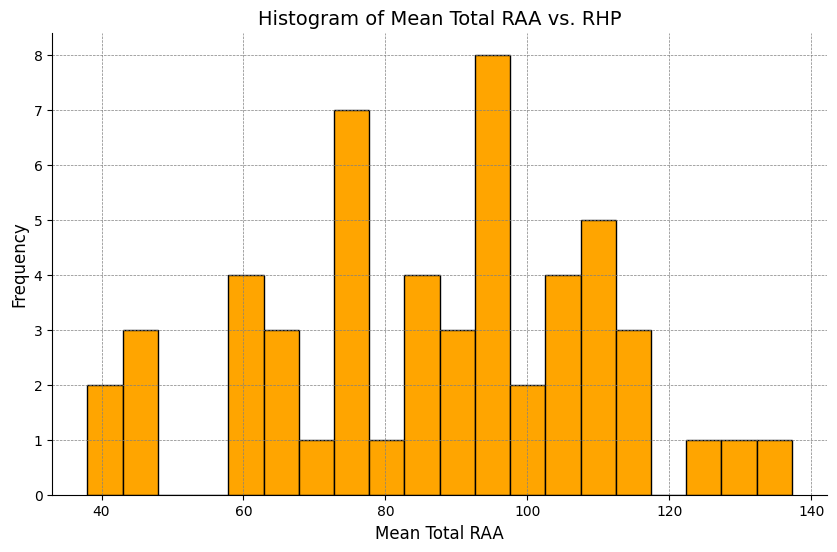

In [18]:
import matplotlib.pyplot as plt

# Extracting 'Mean Total RAA' values from the sorted list
mean_total_raa_values = [entry.get('Mean Total RAA') for entry in sorted_lineup_stats_RHP if 'Mean Total RAA' in entry]

# Creating Histogram of Lineups

plt.figure(figsize=(10, 6))
plt.hist(mean_total_raa_values, bins=20, color='orange', edgecolor='black')

plt.title('Histogram of Mean Total RAA vs. RHP', color='black', fontsize=14)
plt.xlabel('Mean Total RAA', color='black', fontsize=12)
plt.ylabel('Frequency', color='black', fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Changing the color of the ticks to black for consistency
plt.tick_params(colors='black')


plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')


plt.show()



In [6]:
import matplotlib.pyplot as plt

# Extracting 'Mean Total RAA' values from the sorted list
mean_total_raa_values = [entry.get('Mean Total RAA') for entry in sorted_lineup_stats_LHP if 'Mean Total RAA' in entry]


# Creating Histogram of Lineups

plt.figure(figsize=(10, 6))
plt.hist(mean_total_raa_values, bins=20, color='orange', edgecolor='black')

plt.title('Histogram of Mean Total RAA vs. LHP', color='black', fontsize=14)
plt.xlabel('Mean Total RAA', color='black', fontsize=12)
plt.ylabel('Frequency', color='black', fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Changing the color of the ticks to black for consistency
plt.tick_params(colors='black')


plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')


plt.show()



/var/folders/8n/g8bq8_011kv24tnfb649vgmw0000gn/T/ipykernel_1988/2147977177.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8n/g8bq8_011kv24tnfb649vgmw0000gn/T/ipykernel_1988/2147977177.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
create_and_display_lineup_visual(optimized_rhp_lineup, player_data, "RHP")
create_and_display_lineup_visual(optimized_lhp_lineup, player_data, "LHP")

In [26]:
frelick = {
    'id': 664056,
    'Name': 'Sal Frelick',
    'bats': 'R',
    'bat': -1.1945825908574963,
    'bat_sd': 17.0,
    'plat': 0,
    'bat_vsRHP': 0.5964567496379495,
    'bat_vsLHP': -5.01049749422324,
    'C': np.nan,     # Assuming NaN should be represented by np.nan
    '1B': np.nan,
    '2B': np.nan,
    '3B': np.nan,
    'SS': np.nan,
    'LF': 14, # No way it's less than this with respect to the process
    'CF': 14.87755102040816,
    'RF': 23.697683868346203
}


player_data_w_frelick = player_data.append(frelick, ignore_index=True)
player_data_w_frelick.fillna(-1000, inplace=True)
optimized_rhp_lineup, optimized_rhp_runs, optimized_rhp_sd, optimized_lhp_lineup, optimized_lhp_runs, optimized_lhp_sd = optimize_dual_lineups(player_data_w_frelick)
create_and_display_lineup_visual(optimized_rhp_lineup, player_data_w_frelick , "RHP")
create_and_display_lineup_visual(optimized_lhp_lineup, player_data_w_frelick , "LHP")


/var/folders/8n/g8bq8_011kv24tnfb649vgmw0000gn/T/ipykernel_1988/3622556812.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8n/g8bq8_011kv24tnfb649vgmw0000gn/T/ipykernel_1988/2147977177.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8n/g8bq8_011kv24tnfb649vgmw0000gn/T/ipykernel_1988/2147977177.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

